# Approfondissement : Maîtriser la régression linéaire

In [1]:
# Chargement des données de vente à partir de la fiche de référence n° 1
import os
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load a DataFrame with a specific version of a CSV
adsSales = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "thorgodofthunder/tvradionewspaperadvertising/versions/1",
    "Advertising.csv",
)

# Source du jeu de données: https://www.kaggle.com/datasets/thorgodofthunder/tvradionewspaperadvertising
# Propriétaire du jeu de données: Thor God of Thunder (Kaggle)

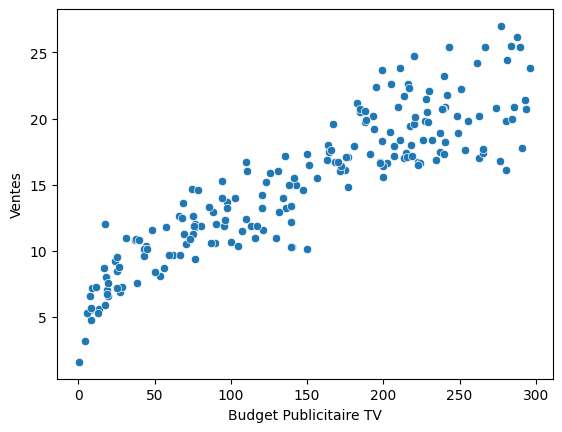

In [2]:
# Visualisation du nuage de points entre les attributs TV et Sales
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("colorblind")
sns.scatterplot(data=adsSales, x="TV", y="Sales")
plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/EDA.pdf", format="pdf", bbox_inches="tight", dpi=300) # Sauvegarde du graphique au format .pdf
plt.show()

## Remarque : le nuage de points entre Sales et TV (budget publicitaire) ressemble à une ligne droite,
##            ce qui suggère une relation linéaire entre la télévision et les ventes.

## Modèles de Regréssion Linéaire

Pour une variable cible donnée $y$ et $L$ variables caractéristiques $x_1,\ldots,x_L$, la construction d'une régression linéaire repose sur l'hypothèse (qui peut être erronée) que le modèle (décrivant la relation entre la cible et les caractéristiques) a la forme suivante :
$$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_L x_L,$$
où $\theta_0, \theta_1, \ldots, \theta_L$ sont les paramètres du modèle.

L'apprentissage d'un modèle de régression linéaire consiste à trouver les meilleures estimations possibles de $\theta_0, \theta_1, \ldots, \theta_L$ à partir des données, c'est-à-dire $y$ et $x_1,\ldots,x_L$.

Dans notre exemple, $y =$ « Sales », et il y a une caractéristique, c'est-à-dire $x_1 =$ « TV ». Cela conduit au modèle :
$$\text{Sales} = \theta_0 + \theta_1 \text{TV},$$
pour lequel les meilleures valeurs de $\hat\theta_0$ et $\hat\theta_1$ seront estimées à partir des données Sales et TV.

## Estimation des paramètres du modèle $\hat\theta_0$ et $\hat\theta_1$

### Méthode 1 : Équation Normale
En régression linéaire, il existe une formule exacte pour estimer les paramètres du modèle. Celle-ci est connue sous le nom d'« Équation Normale ». Pour un jeu de données comportant $N$ échantillons, la solution est donnée par
$$\hat\Theta = (X^TX)^{-1}X^TY,$$
où $\hat\Theta = [\hat\theta_1, \ldots, \hat\theta_L]^T$, $X$ est une matrice de dimension $N\times L$, c'est-à-dire toutes les données caractéristiques du jeu de données, et $Y = [y_1, y_2, \ldots, y_N]^T$, c'est-à-dire toutes les données cibles du jeu de données.

In [4]:
# Implementation de l'Équation Normale
import numpy as np

def normal_equation_fit(X, Y):
    X_exp = np.c_[np.ones((X.shape[0], 1)), X] # Ajout d'un échantillon pour l'estimation de theta_0
    return np.linalg.inv(X_exp.T.dot(X_exp)).dot(X_exp.T).dot(Y)

# Estimation des meilleurs paramètres du modèle pour Sales and TV data
best_parameters = normal_equation_fit(adsSales[["TV"]], adsSales[["Sales"]])

best_parameters

array([[6.97482149],
       [0.05546477]])

## Estimations des Paramètres du Modèle
Sur la base des données, les meilleures estimations possibles des paramètres du modèle selon l'Équation Normale sont $\hat\theta_0 = 6,97482149$ et $\hat\theta_1 = 0,05546477$, ce qui conduit au modèle linéaire
$$\text{Sales} = 6,97482149 + 0,05546477\text{TV}.$$

## Prédictions du Modèle
Pour un échantillon donné $x$, une prédiction est obtenue à l'aide de la formule
$$\hat y = x\hat\Theta.$$

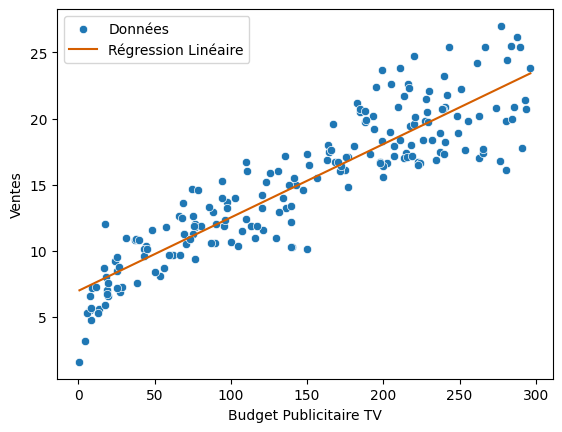

In [5]:
# Implementation de la prediction
def predict(best_parameters, X):
    X_exp = np.c_[np.ones((X.shape[0], 1)), X] # Ajout d'un échantillon pour l'utilisation de theta_0
    return X_exp.dot(best_parameters)

# Prédiction de Sales (ventes) en utilisant les données TV et le modèle
sales_predict = predict(best_parameters, adsSales[["TV"]])
sns.scatterplot(data=adsSales, x="TV", y="Sales")
sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color="#d55e00")
plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend(["Données", "Régression Linéaire"])
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/RegressionLineaire.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

## Méthode 2 : « Équation normale optimisée » de Scikit-Learn
Cette méthode est optimisée car elle tient compte de la possibilité que l'Équation Normale soit lente pour un grand nombre d'attributs ou échoue en cas de multicolinéarité. La solution optimisée se présente sous la forme suivante :
$$\hat\Theta = X^+Y,$$
où $X^+$ est l'inverse (pseudo) de Moore-Penrose de $X$ et est toujours défini.

In [6]:
# Entrînement et évaluation sur l'ensemble de formation : Régression Linéaire
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(adsSales[["TV"]], adsSales[["Sales"]])

lin_reg.intercept_, lin_reg.coef_

## Remarque : Scikit-Learn et l'équation normale conduisent au même
##            modèle linéaire dans ce cas.

(array([6.97482149]), array([[0.05546477]]))

## Méthode 3 : Descente de Gradient
Au lieu d'une formulation exacte pour estimer les paramètres du modèle, la descente de gradient utilise une approche numérique qui offre un gain de performance si le nombre d'attributs $L$ ou la taille de l'échantillon $N$ est très grand.

### Méthode 3.1 : Descente de Gradient par lots
L'estimation commence par une estimation initiale $\Theta^{(0)}$ des paramètres du modèle, puis l'algorithme améliore de manière itérative l'estimation à un taux prédéfini défini par le « taux d'apprentissage » $\eta$, de sorte que l'estimation à l'itération $t+1$ est donnée par 
$$\Theta^{(t+1)} = \Theta^{(t)} - \eta\frac{2}{N}X^T\big(X\Theta^{(t)} - Y\big).$$
L'algorithme s'exécutera jusqu'à convergence, c'est-à-dire jusqu'à ce que la différence $||\Theta^{(t+1)} - \Theta^{(t)}||_2 < \epsilon$ soit vérifiée ou jusqu'à ce qu'un nombre prédéfini d'itérations $n_{\text{iter}}$ soit atteint. Notez que $\epsilon$ est la tolérance (un nombre très petit, par exemple $10^{-8}$).

In [ ]:
# Implementation de la descente de gradient par lot
def batch_gradient_descent_fit(X, Y, theta_0, eta=0.1, epsilon=1e-8, n_iterations=1000, keep_history=False):
    theta_prev = theta_0.copy()
    theta_next = theta_prev
    n_iter = 0

    N = X.shape[0]
    X_stand = (X - X.mean(axis=0)) / X.std(axis=0) # Standardization des données
    X_exp = np.c_[np.ones((N, 1)), X_stand] 

    condition = 1 # Initialization de la condition sur la distance Euclidienne entre estimations consécutives

    theta_next_history =[theta_prev.flatten()]

    while(condition > epsilon and n_iter < n_iterations):
        grad = (2 / N) * X_exp.T.dot(X_exp.dot(theta_prev) - Y)
        theta_next = theta_prev - eta * grad

        if(keep_history):
            theta_next_history.append(theta_next.flatten()) # Sauvegarde (optionelle) des paramètres appris

        condition = np.linalg.norm(theta_next - theta_prev) # Mise à jour de la condition
        theta_prev = theta_next
        n_iter += 1

    return theta_next, np.array(theta_next_history)

# Estimation des meilleurs paramètres du modèle
n_coef = adsSales[["TV"]].shape[1] + 1 # Nombre de paramètres nécessaires
np.random.seed(42)
theta_init = np.random.randn(n_coef, 1) # Estimation initiale (choix aléatoire)
best_parameters, theta_history = batch_gradient_descent_fit(adsSales[["TV"]], adsSales[["Sales"]], theta_0=theta_init, eta=0.1, keep_history=True)

best_parameters

## Remarque : la descente de gradient par lots et l'équation normale conduisent à un modèle linéaire différent
##            dans ce cas. Les estimations dépendent de l'hypothèse initiale.

array([[15.13049997],
       [ 4.7618855 ]])

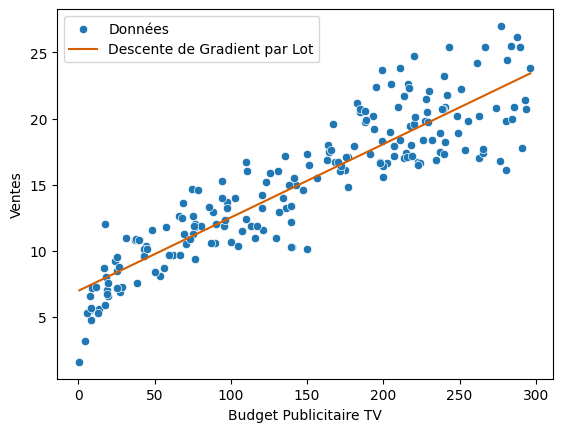

In [8]:
# Prédiction de Sales (ventes) en utilisant les données TV et le modèle
X_stand = (adsSales[["TV"]] - adsSales[["TV"]].mean(axis=0)) / adsSales[["TV"]].std(axis=0) # Standardization des données
sales_predict = predict(best_parameters, X_stand)

sns.scatterplot(data=adsSales, x="TV", y="Sales")
sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color= "#d55e00")
plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend(["Données", "Descente de Gradient par Lot"])
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/DescentedeGradientParLot_1e-1.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

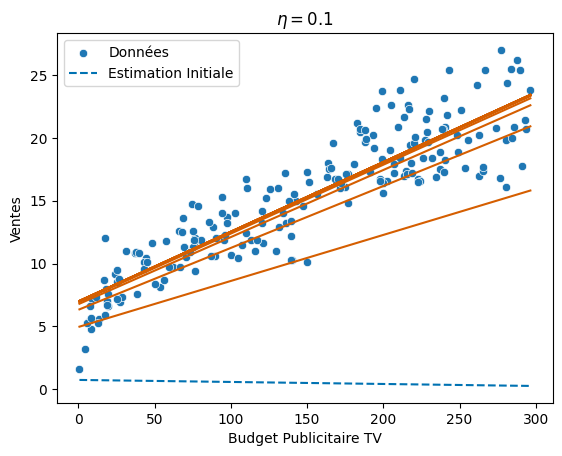

In [9]:
# Visualisation du taux d'apprentissage de la descente de gradient par lot
X_stand = (adsSales[["TV"]] - adsSales[["TV"]].mean(axis=0)) / adsSales[["TV"]].std(axis=0)
sns.scatterplot(data=adsSales, x="TV", y="Sales")
for i in range(0, len(theta_history), 5):
    sales_predict = predict(theta_history[i, :], X_stand)
    colour_value = "#d55e00"
    linetype = "-"
    if(i == 0):
        colour_value = "#0072b2"
        linetype = "--"
    sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color=colour_value, linestyle=linetype)

plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend(["Données", "Estimation Initiale"])
plt.title("$\eta = 0.1$")
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/DGparLotIterations_1e-1.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

### Méthode 3.1 : Descente de Gradient Stochastique(SGD)
La SGD améliore la vitesse de la descente du gradient par lots en s'entraînant sur une instance  $X_{(j)}$ aléatoirement à chaque itération au lieu du jeu de données complet $X$. De plus, la SGD permet d'éviter le risque de rester bloqué à un minimum local au lieu du minimum global en ajustant le taux d'apprentissage à l'aide d'un « programme d'apprentissage ». Plusieurs formules peuvent être utilisées pour calculer le taux d'apprentissage.

L'estimation commence par une estimation initiale $\Theta^{(0)}$ des paramètres du modèle, puis l'algorithme améliore de manière itérative l'estimation à un taux prédéfini défini par le « taux d'apprentissage » $\eta$, de sorte que l'estimation à l'itération $t+1$ est donnée par 
$$\Theta^{(t+1)} = \Theta^{(t)} - \eta 2X_{(j)}^T\big(X_{(j)}\Theta^{(t)} - Y_{(j)}\big).$$
L'algorithme s'exécutera jusqu'à convergence, c'est-à-dire jusqu'à ce que la différence $||\Theta^{(t+1)} - \Theta^{(t)}||_2 < \epsilon$ soit vérifiée ou jusqu'à ce qu'un nombre prédéfini d'itérations $n_{\text{iter}}$ soit atteint. Notez que $\epsilon$ est la tolérance (un nombre très petit, par exemple $10^{-8}$).

In [10]:
# Implementation de la descente de gradient stochastique (SGD)
def learning_schedule(iter, scaling=5, smoothing=50):
    return scaling / (iter + smoothing)


def stochastic_gradient_descent_fit(X, Y, theta_0, scaling=5, smoothing=50, epsilon=1e-8, n_epochs=50, keep_history=False):
    theta_prev = theta_0.copy()
    theta_next = theta_prev
    n_epoch = 0

    N = X.shape[0]
    X_stand = (X - X.mean(axis=0)) / X.std(axis=0) # Standardization des données X
    X_exp = np.c_[np.ones((N, 1)), X_stand] 

    condition = 1 # Initialization de la condition sur la distance Euclidienne entre estimations consécutives

    theta_next_history =[theta_prev.flatten()]

    while(condition > epsilon and n_epoch < n_epochs):
        for i in range(N):
            random_idx = np.random.randint(N)
            x_i = X_exp[random_idx:random_idx+1]
            y_i = Y[random_idx:random_idx+1]
            grad = 2 * x_i.T.dot(x_i.dot(theta_prev) - y_i)
            eta = learning_schedule(n_epoch * N + i, scaling, smoothing)
            theta_next = theta_prev - eta * grad

        if(keep_history):
            theta_next_history.append(theta_next.flatten()) 

        condition = np.linalg.norm(theta_next - theta_prev) 
        theta_prev = theta_next
        n_epoch += 1

    return theta_next, np.array(theta_next_history)

# Estimation des meilleurs paramètres du modèle
n_coef = adsSales[["TV"]].shape[1] + 1 # Number of model parameters
np.random.seed(42)
theta_init = np.random.randn(n_coef, 1) # Initial guess
best_parameters, theta_history = stochastic_gradient_descent_fit(adsSales[["TV"]], adsSales[["Sales"]], theta_0=theta_init, scaling=1000, smoothing=250, n_epochs=1000, keep_history=True)

best_parameters

array([[14.91703793],
       [ 4.48767259]])

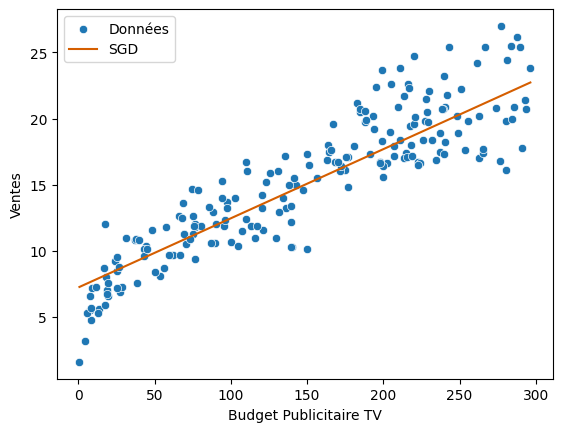

In [11]:
# Prédiction de Sales (ventes) en utilisant les données TV et le modèle
X_stand = (adsSales[["TV"]] - adsSales[["TV"]].mean(axis=0)) / adsSales[["TV"]].std(axis=0)
sales_predict = predict(best_parameters, X_stand)

sns.scatterplot(data=adsSales, x="TV", y="Sales")
sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color= "#d55e00")
plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend(["Données", "SGD"])
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/SGD_1000-250.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

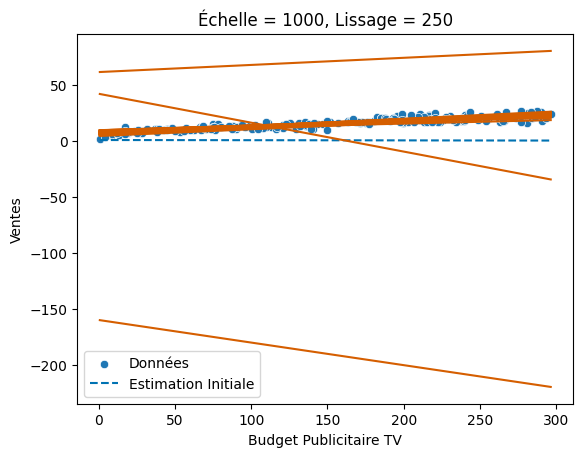

In [ ]:
# Visualisation du taux d'apprentissage du SGD
X_stand = (adsSales[["TV"]] - adsSales[["TV"]].mean(axis=0)) / adsSales[["TV"]].std(axis=0)
sns.scatterplot(data=adsSales, x="TV", y="Sales")
for i in range(0, len(theta_history), 5):
    sales_predict = predict(theta_history[i, :], X_stand)
    colour_value = "#d55e00"
    linetype = "-"
    if(i == 0):
        colour_value = "#0072b2"
        linetype = "--"
    sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color=colour_value, linestyle=linetype)

plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend(["Données", "Estimation Initiale"])
plt.title("Échelle = 1000, Lissage = 250")
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/SGDEpochs_1000-250.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

In [13]:
# SGD avec Scikit-learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-8, penalty=None, eta0=0.1)
sgd_reg.fit(X_stand, adsSales[["Sales"]])

sgd_reg.intercept_, sgd_reg.coef_

/media/christian/22F4BCAE291A75E1/Learning/MLenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([15.13608061]), array([4.8670387]))

# Régression Polynomiale
Lorsque les données ne forment pas une ligne droite (mais ont une courbure), comme dans le cas des données « Sales vs TV », un modèle plus complexe tel qu'un polynôme peut être plus précis pour saisir la non-linéarité. Dans ce cas, le modèle a, dans le cas univarié, la forme suivante :

$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_L x^L.$$

Dans notre exemple, pour un polynôme du second degré, le modèle est
$$\text{Sales} = \theta_0 + \theta_1 \text{TV} + \theta_2 \text{TV}^2.$$

Le degré du polynôme est un hyperparamètre dont la meilleure valeur peut être trouvée à l'aide d'une courbe d'apprentissage. Les modèles de régression polynomiale sont construits à partir de modèles linéaires tels que la régression linéaire et la descente de gradient.

In [14]:
# Régression polynomiale à l'aide de la régression linéaire

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(adsSales[["TV"]])

lin_reg = LinearRegression()
lin_reg.fit(X_poly, adsSales[["Sales"]])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


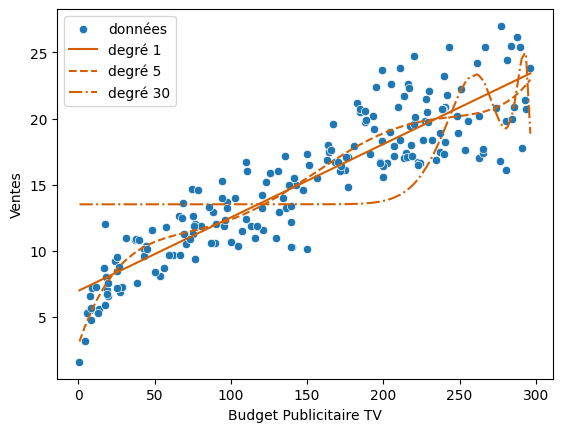

In [ ]:
degrees = [1, 5, 30]
linetype_value = ["-", "--", "-."]
sns.scatterplot(data=adsSales, x="TV", y="Sales", label="données")
for degree, line in zip(degrees, linetype_value):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(adsSales[["TV"]])

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, adsSales[["Sales"]])

    # Visualisation du modèle
    sales_predict = lin_reg.predict(X_poly)
    sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color=colour_value, linestyle=line, label=f"degré {degree}")

plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend()
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/Complexite.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

# Évaluation de l'Adéquation du Modèle : surajustement vs sous-ajustement

## Complexité et généralisation du modèle
1. Les modèles complexes (par exemple, les polynômes de haut degré) s'adaptent étroitement aux données, mais sont souvent peu performants sur de nouvelles données : surajustement
2. Les modèles simples (par exemple, les modèles linéaires) peuvent ne pas saisir les tendances importantes et être peu performants tant sur les données d'apprentissage que sur les nouvelles données : sous-ajustement

Compromis : choisir la bonne complexité permet d'équilibrer le biais (erreur due au choix d'un modèle incorrect) et la variance (erreur due à un modèle trop complexe/flexible). Une complexité accrue du modèle entraîne généralement une variance élevée et un biais faible, tandis que les modèles plus simples ont généralement un biais élevé et une variance faible.

L'adéquation du modèle peut être visualisée à l'aide d'une « courbe d'apprentissage », qui montre comment les erreurs des données d'apprentissage et de validation évoluent en fonction de la taille des données d'apprentissage.

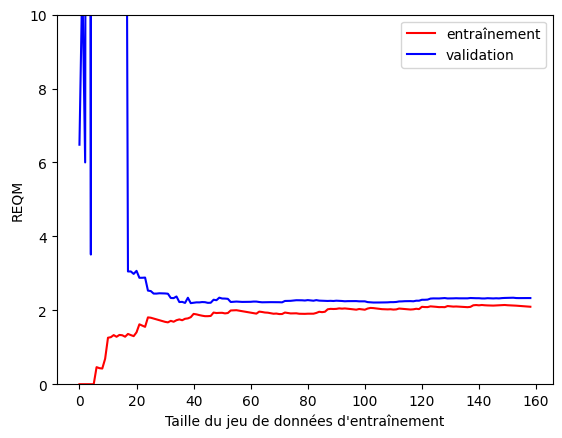

In [ ]:
# Visualisation de la courbe d'apprentissage pour les données Sales vs TV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_erros = [], []

    for N in range(1, len(X_train)):
        model.fit(X_train[:N], y_train[:N])
        y_train_predict = model.predict(X_train[:N])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:N], y_train_predict))
        val_erros.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-", label="entraînement")
    plt.plot(np.sqrt(val_erros), "b-", label="validation")
    plt.xlabel("Taille du jeu de données d'entraînement")
    plt.ylabel("REQM")
    plt.ylim(bottom=0, top=10)
    plt.legend()

# Polynôme de degré 5 (degré 1 = Regression linéaire)
lin_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(adsSales[["TV"]])
plot_learning_curves(lin_reg, X_poly, adsSales[["Sales"]])

## Remarque : bonne adéquation = REQM faible + écart faible entre l'entraînement et la validation

## Améliorer l'Ajustement du Modèle
Plusieurs méthodes peuvent aider à améliorer le surajustement du modèle. L'une des approches les plus courantes est la régularisation.

### Méthode 1 : Régression Ridge
Cette méthode permet de trouver les valeurs optimales pour les paramètres du modèle, par exemple $\theta_1, \theta_2, \ldots, \theta_L$, tout en les forçant à rester aussi petites que possible. La solution exacte pour les estimations des paramètres du modèle à l'aide de la régression Ridge est 

$$\Theta = \big(X^TX + \alpha I\big)^{-1}X^T y,$$
où $\alpha$ est l'hyperparamètre contrôlant le degré de régularisation du modèle et $I$ est la matrice identité.

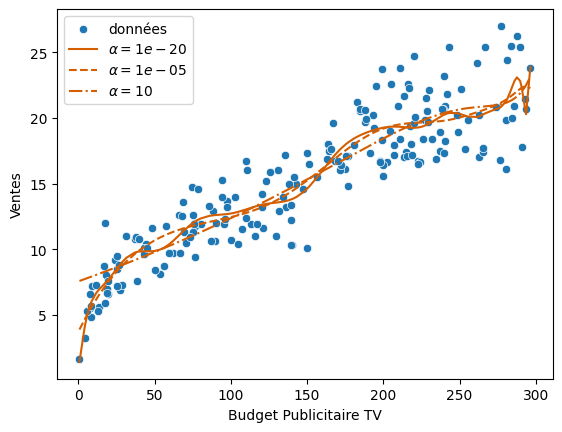

In [ ]:
# Visualisation de l'effet de alpha: Régression Ridge

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

alphas = [1e-20, 1e-5, 10]
sns.scatterplot(data=adsSales, x="TV", y="Sales", label="données")
for alpha, line in zip(alphas, linetype_value):
    model = make_pipeline(
        PolynomialFeatures(degree=30, include_bias=False),
        StandardScaler(),
        Ridge(alpha=alpha, random_state=42)
    )
    model.fit(adsSales[["TV"]], adsSales[["Sales"]])

    # Visualisation du modèle
    sales_predict = model.predict(adsSales[["TV"]])
    sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color=colour_value, linestyle=line, label=f"$\\alpha = {alpha}$")

plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend()
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/RegressionRidge.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

## Remarque : la régression par crêtes peut également être effectuée avec des modèles de descente de gradient en définissant penalty=“l2”.

### Méthode 2 : Régression par lasso
Semblable à la régression Ridge, mais avec une approche légèrement différente pour forcer les paramètres du modèle, par exemple $\theta_1, \theta_2, \ldots, \theta_L$, à être aussi petits que possible. Ici, le modèle tend à fixer à zéro les coefficients $\theta_i$ pour lesquels les attributs $X_i$ sont moins importants.

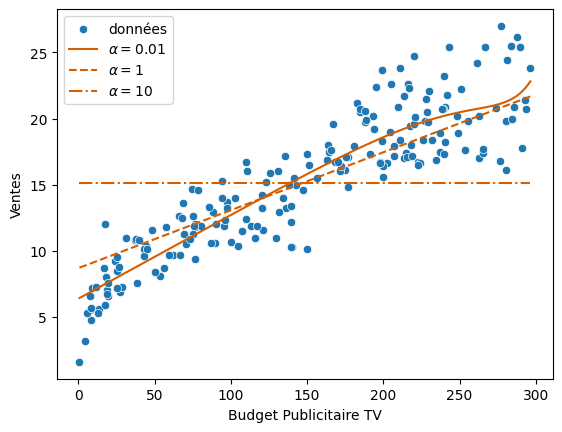

In [20]:
# Visualisation de l'effet de alpha: Régression par Lasso

from sklearn.linear_model import Lasso

alphas = [1e-2, 1, 10]
sns.scatterplot(data=adsSales, x="TV", y="Sales", label="données")
for alpha, line in zip(alphas, linetype_value):
    model = make_pipeline(
        PolynomialFeatures(degree=30, include_bias=False),
        StandardScaler(),
        Lasso(alpha=alpha, random_state=42)
    )
    model.fit(adsSales[["TV"]], adsSales[["Sales"]])

    # Visualisation du modèle
    sales_predict = model.predict(adsSales[["TV"]])
    sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color=colour_value, linestyle=line, label=f"$\\alpha = {alpha}$")

plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend()
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/RegressionparLasso.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

## Remarque : l'utilisation de Lasso avec alpha=0 est déconseillée, car l'algorithme est numériquement instable et ne converge pas.
##            La régressionpar Lasso peut être utilisée avec la descente de gradient en définissant penalty='l1'.

### Méthode 3 : Régularisation Élastique ou Régression Elastic Net
Elle combine la régularisation Ridge et Lasso, et le mélange est contrôlé par le rapport de mélange $r$, qui est un hyperparamètre. Lorsque $r = 0$, Elastic Net correspond à la régression Ridge, et correspond à la régression Lasso lorsque $r = 1$. 

/media/christian/22F4BCAE291A75E1/Learning/MLenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+03, tolerance: 5.556e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


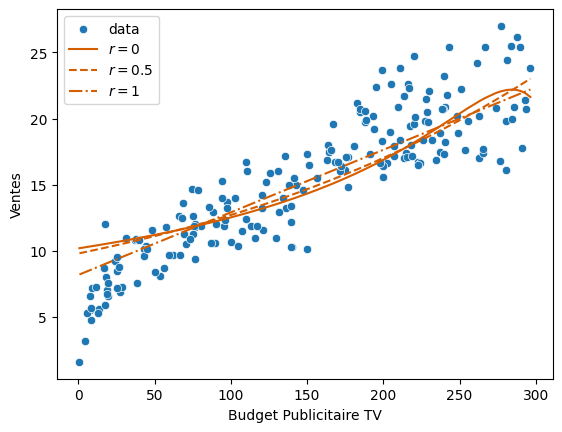

In [21]:
# Visualisation de l'effet de alpha et r: Régression Elastic Net

from sklearn.linear_model import ElasticNet

alpha = 7e-1
l1_ratios = [0, 0.5, 1]
sns.scatterplot(data=adsSales, x="TV", y="Sales", label="data")
for l1_ratio, line in zip(l1_ratios, linetype_value):
    model = make_pipeline(
        PolynomialFeatures(degree=30, include_bias=False),
        StandardScaler(),
        ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    )
    model.fit(adsSales[["TV"]], adsSales[["Sales"]])

    # Visualisation du modèle
    sales_predict = model.predict(adsSales[["TV"]])
    sns.lineplot(x=adsSales["TV"], y=sales_predict.ravel(), color=colour_value, linestyle=line, label=f"$r = {l1_ratio}$")

plt.xlabel("Budget Publicitaire TV")
plt.ylabel("Ventes")
plt.legend()
plt.savefig("./InProgress/03-ML-CheatSheet-DeepDive-RegressionAlgorithms/FR/Images/RegressionElasticNet.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()